# Restaurant Sentiment Classification

#### Developers
- Simon Manna [Machine Learning & AI Engineer] 
- Merhawi Tsegay [Machine Learning Engineer]

#### Import Python Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import spacy

In [4]:
# Prepare dataset
data = pd.read_csv('C:\\datasets\\restaurant_reviews.csv')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  2220 non-null   object 
 1   Liked   2117 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB
None


In [7]:
# Check the shape of the dataset
print(data.shape)

(2220, 2)


In [8]:
# Check for null values
print(data.isna().sum())

Review      0
Liked     103
dtype: int64


In [9]:
# Drop the null values
data.dropna(axis=0, inplace=True)

In [10]:
# Load the small or medium spacy English corpus
nlp = spacy.load("en_core_web_md")

In [11]:
# check the first Row Review, to see how the data looks like.
doc = nlp(data.iloc[0]['Review'])

print(f"Token","POS","Lemma")
for token in doc:
    print(token.text, token.pos_, token.lemma_) #, spacy.spacy_explain(token.lemma_)

Token POS Lemma
Wow INTJ wow
... PUNCT ...
Loved VERB love
this DET this
place NOUN place
. PUNCT .


In [12]:
# Check the spacy process pipeline
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x000001AE8ED229E0>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x000001AE916C9E40>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x000001AE91590350>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x000001AE91937BC0>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x000001AE91947780>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x000001AE915905F0>)]


### Remove Emojis (Replace the Emojis with Text Data)

In [13]:
# Convert Emojis to test
import emoji
def convert_emoji_to_text(emoji_text):
    text_with_aliases = emoji.demojize(emoji_text)
    return text_with_aliases

In [14]:
data['Review'] = data['Review'].apply(convert_emoji_to_text)

### Preprocess and Clean the data

In [20]:
# Remove the Non Alphanumeric words
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[\W_]+', ' ',x))

In [21]:
# Make the text into lower case
data['Review'] = data['Review'].str.lower()

In [22]:
# Remove Stop Words
def remove_stop_words(doc):
    return " ".join([token.text for token in nlp(doc) if not token.is_stop])

data['Review'] = data['Review'].apply(remove_stop_words)

In [23]:
# Lemmatize the words to their base/root word
def lemmatize_text(text):
    return " ".join([token.lemma_ for token in nlp(text)])

data['Review'] = data['Review'].apply(lemmatize_text)

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [25]:
text_data = data['Review']

In [26]:
text = " ".join(text_data.values)

In [27]:
wordcloud = WordCloud(background_color='white').generate(text)

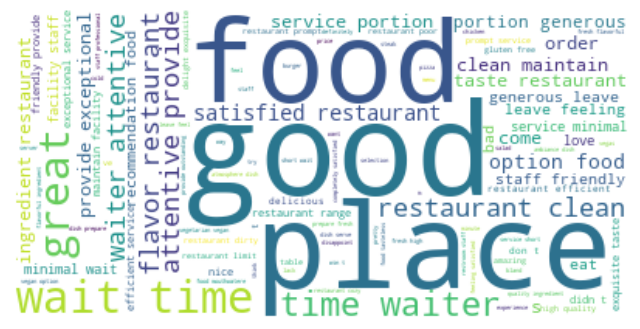

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Feature Extraction and Vectorization

In [29]:
# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Review']).toarray()
print(X.shape)

(2117, 1781)


In [30]:
# Prepare y(target value)
y = data['Liked']

#### Prepare Training and Test Data

In [31]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Models

In [32]:
# Import Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

In [33]:
# Initialize algorithms
logistic_classifier = LogisticRegression()
multinomial_classifier = MultinomialNB()
decision_tree_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
random_forest_classifier = RandomForestClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Model Algorithms List
algorithms = [logistic_classifier, multinomial_classifier, decision_tree_classifier, 
              svm_classifier, random_forest_classifier, xgb_clf]

In [34]:
for algorithm in algorithms:
    print(f"{algorithm.__class__.__name__}")
    # Train the Algorithm
    algorithm.fit(X_train,y_train)
    # Make Prediction
    y_pred = algorithm.predict(X_test)
    # Measure Accuracy
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    # Classification Report
    print("Classification Report: ")
    eval_result = classification_report(y_test, y_pred)
    print(eval_result)

LogisticRegression
Accuracy: 0.8773584905660378
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       194
         1.0       0.95      0.81      0.88       230

    accuracy                           0.88       424
   macro avg       0.88      0.88      0.88       424
weighted avg       0.89      0.88      0.88       424

MultinomialNB
Accuracy: 0.875
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       194
         1.0       0.88      0.89      0.89       230

    accuracy                           0.88       424
   macro avg       0.87      0.87      0.87       424
weighted avg       0.87      0.88      0.87       424

DecisionTreeClassifier
Accuracy: 0.8537735849056604
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       194
         1.0       0.90      0.82  